# What is Principal Component Analysis?

In data science, we often run into datasets with a very large number of features. This is often called the **curse of dimensionality** and can cause a lot of issues, especially overfitting and undervaluing important features. Many features can be redundant or carry little to no information of value. Not to mention massive datasets can cause models to run a lot slower. 

To lift this curse, we rely on tools from the area of machine learning called **dimension reduction**. Dimensionality reduction seeks to move (or project) data into lower dimensional space while still retaining the important information. 

Broadly, dimension reduction techniques are classified as **linear** or **nonlinear**.  Today we will focus on a linear technique called Principal Component Analysis (PCA). PCA is the most common algorithm for dimension reduction and is used all over in data science, statistics, and machine learning. 

For an introduction to PCA, watch **only the first ten minutes** of the following video to get an idea of how PCA works.

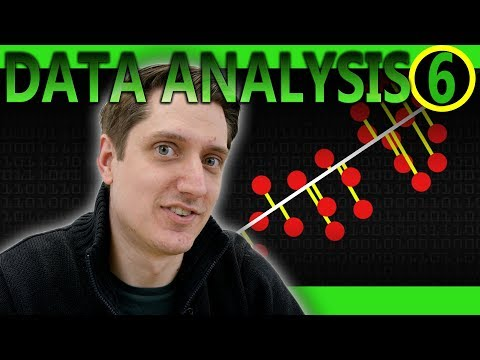

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("TJdH6rPA-TI",width=640,height=360)

If you're interested in the specifics of the PCA algortithm [this article](https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643) does a good job of explaining how the algorithm works, and [this one](https://medium.com/data-science-365/an-in-depth-guide-to-pca-with-numpy-1fb128535b3e) gives a good explanation on how you might go about implementing the algorithm by hand (we won't do that in this course).

## Data Scaling

PCA is very sensitive to the relative scaling of features in data. That is, if features are scaled differently, the ones with larger values will be treated as much more significant than ones with smaller values, even if that isn't actually the case. To get around this issue we standardize the scale of our data. 

Convieniently, scikit-learn has a class `sklearn.preprocessing.StandardScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) that that can handle this scaling for us. Using it is similar to using other classes in sklearn, here's a code snippet to help:



```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data)

scaled_data = scaler.transform(data)

```

Let's try this with the iris setosa data. First we need to read in the data:

In [24]:
import pandas as pd

iris_df = pd.read_csv('https://raw.githubusercontent.com/dannycab/MSU_REU_ML_course/main/notebooks/day-1/iris.data',
                     names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'],
                     sep = ' ')

iris_df_dropped = iris_df.drop(['species'], axis = 1) # new dataframe without species
iris_df_dropped.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Now we can actually do the scaling:

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(iris_df_dropped)

scaled_data = scaler.transform(iris_df_dropped)

scaled_data_df = pd.DataFrame(scaled_data, # need to give columns again since transform method returns a 2d numpy array
                               columns = ['sepal length', 'sepal width', 'petal length', 'petal width']) 

scaled_data_df.head()

sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977

Look at how the range of possible values for each data has changed. 